In [31]:
import numpy as np
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la API
api = KaggleApi()
api.authenticate()

# Descargar el dataset
dataset = "rgerschtzsauer/tempering-data-for-carbon-and-low-alloy-steels"
api.dataset_download_files(dataset, path="../data/", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rgerschtzsauer/tempering-data-for-carbon-and-low-alloy-steels


In [32]:
# 🎯 Configuraciones generales
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# 📂 Cargar el dataset
df = pd.read_csv("../data/Tempering data for carbon and low alloy steels - Raiipa.csv")

# 🧮 Mostrar primeras 10 filas
df.head(10)

,Source,Steel type,Initial hardness (HRC) - post quenching,Tempering time (s),Tempering temperature (ºC),C (%wt),Mn (%wt),P (%wt),S (%wt),Si (%wt),Ni (%wt),Cr (%wt),Mo (%wt),V (%wt),Al (%wt),Cu (%wt),Final hardness (HRC) - post tempering
0,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,204.4,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,50.6
1,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,260.0,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,48.3
2,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,315.6,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,43.7
3,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,371.1,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,40.5
4,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,426.7,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,37.3
5,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,482.2,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,31.2
6,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,537.8,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,26.2
7,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,593.3,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,23.1
8,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,648.9,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,17.3
9,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,704.4,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,11.7


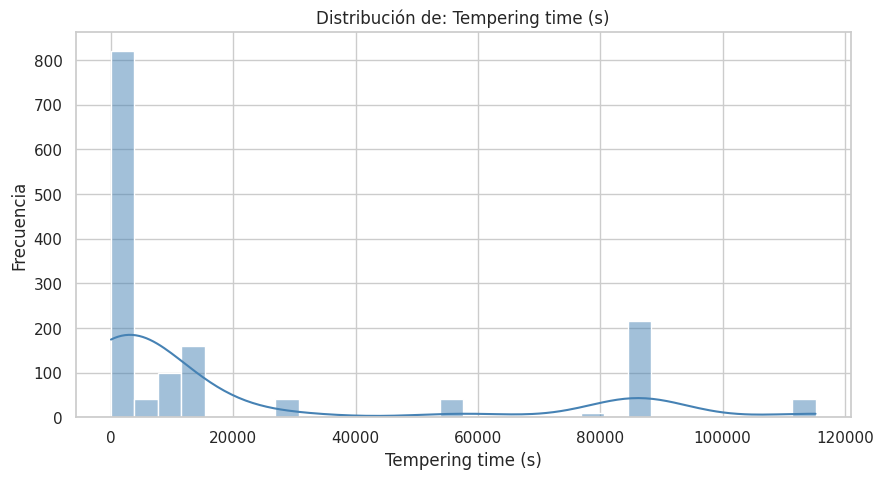

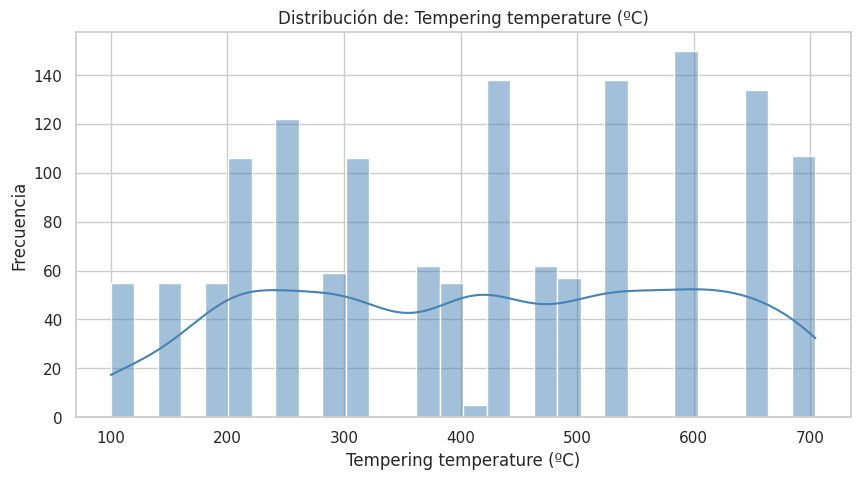

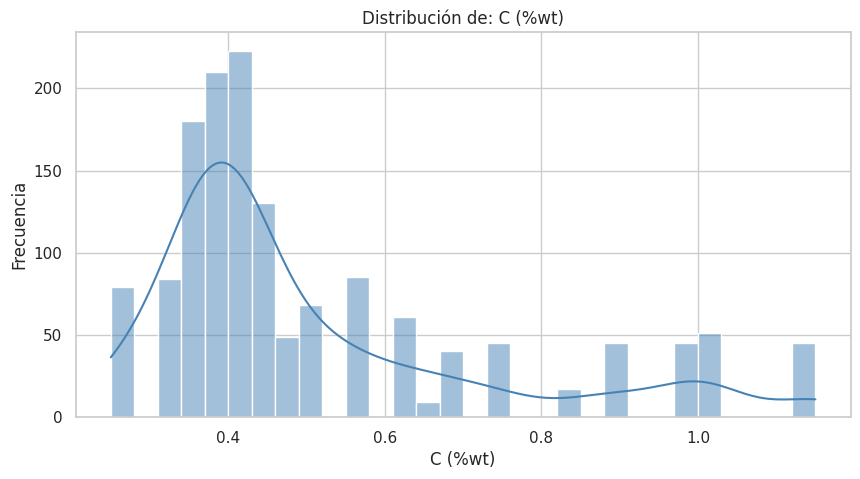

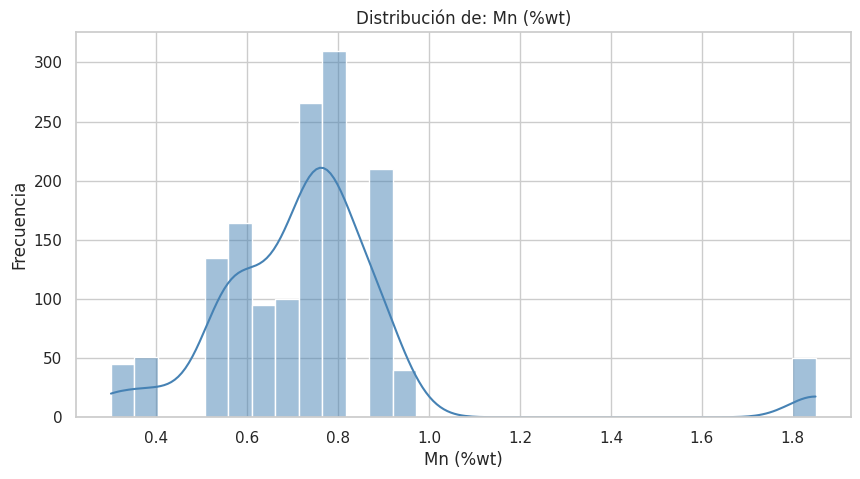

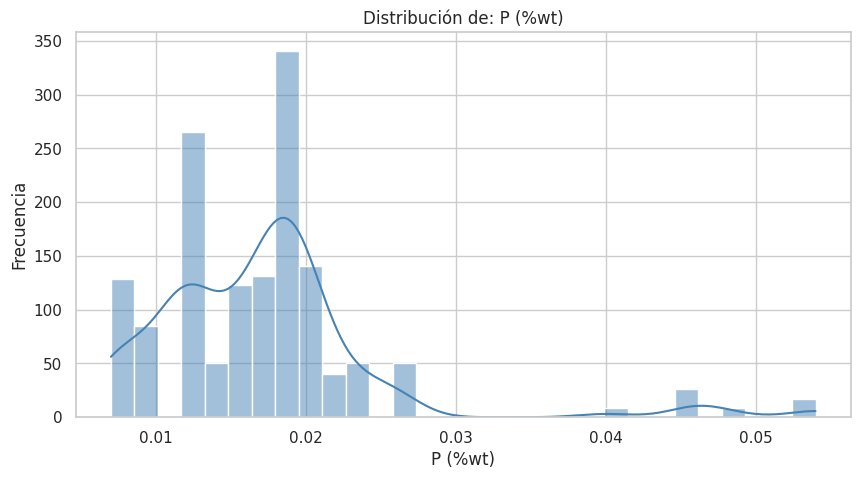

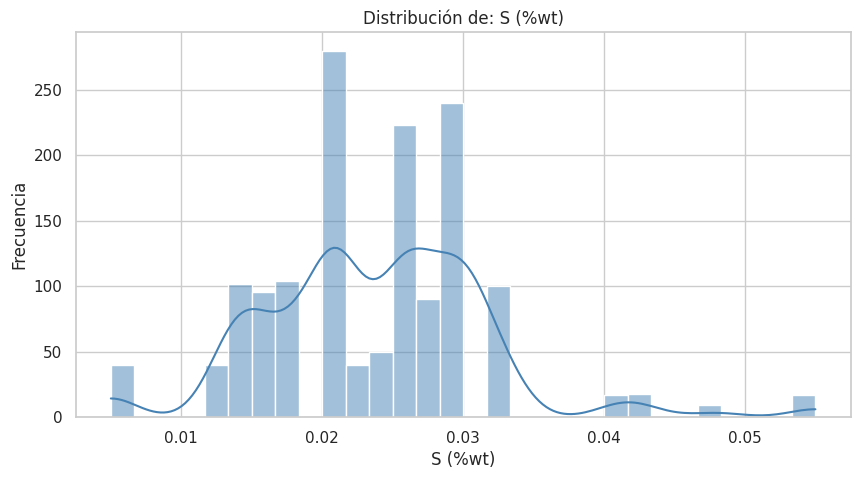

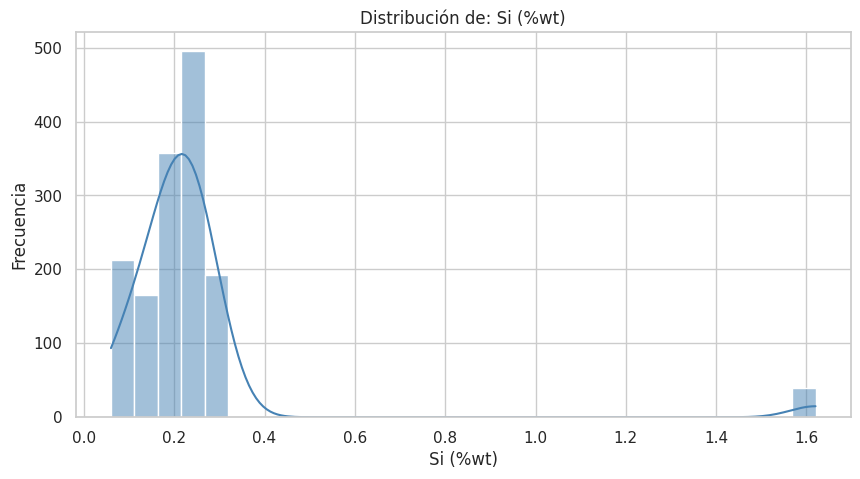

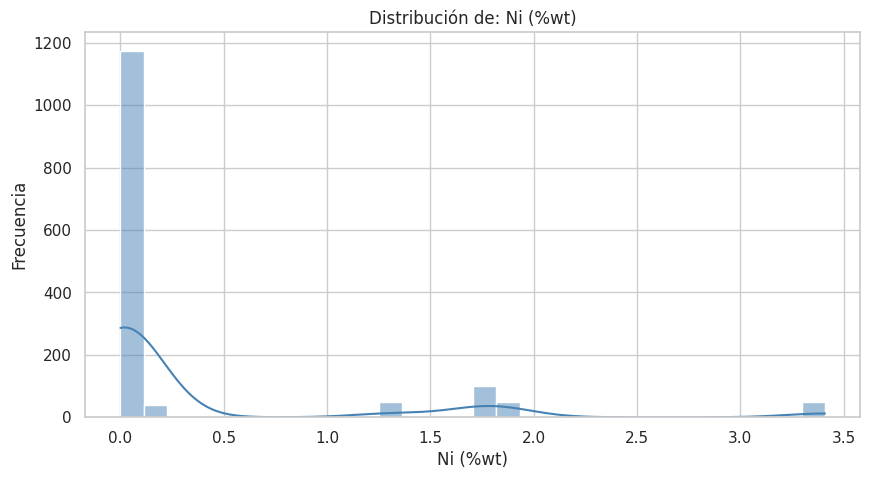

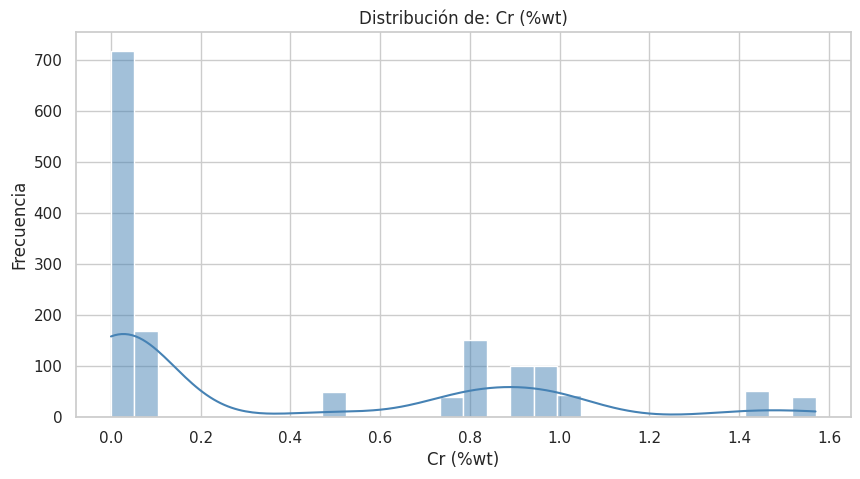

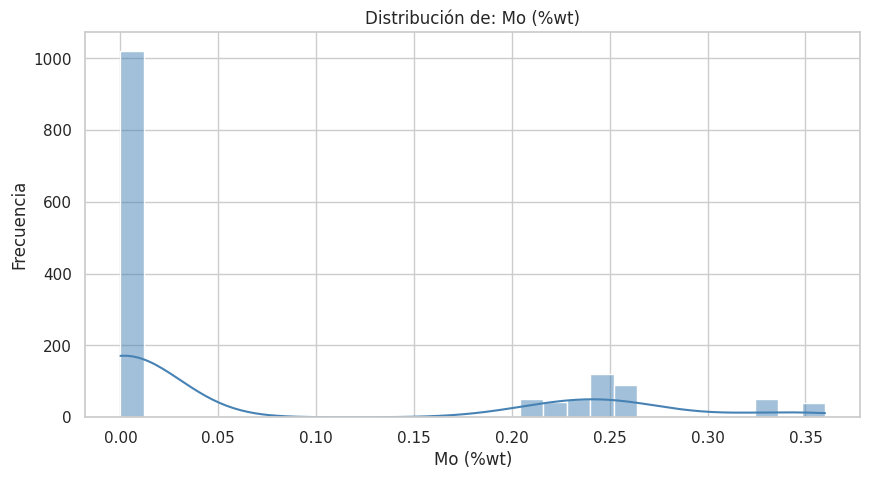

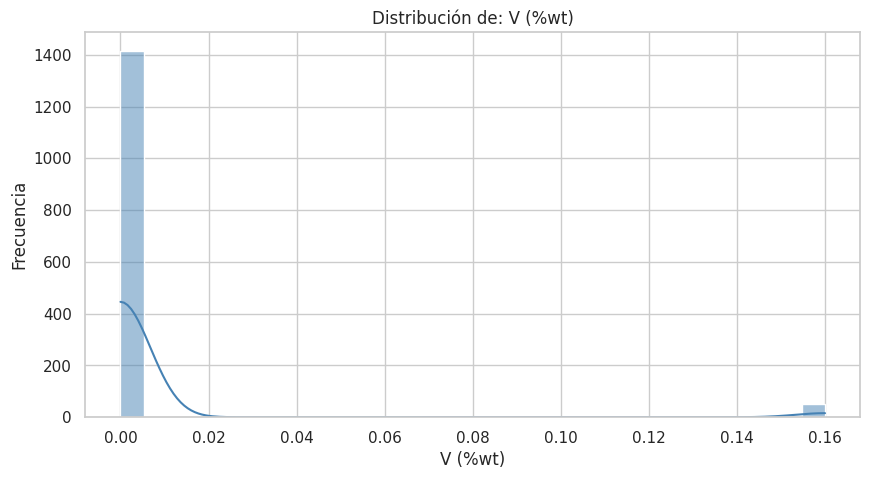

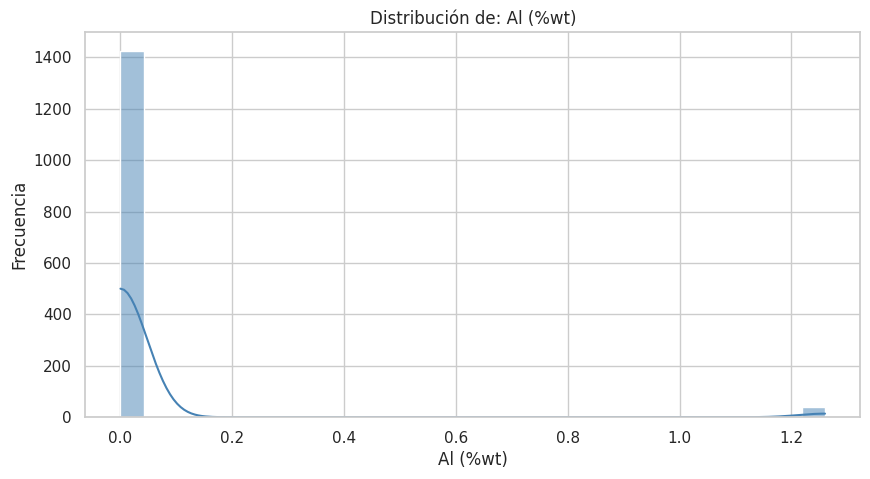

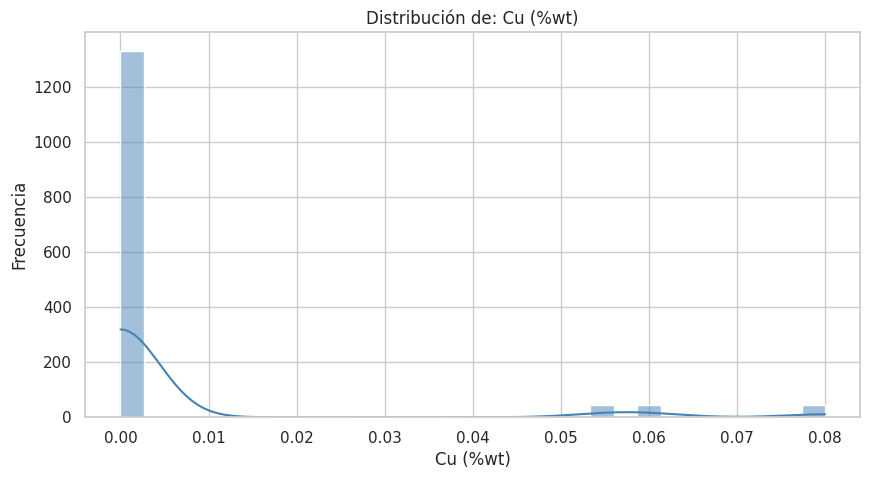

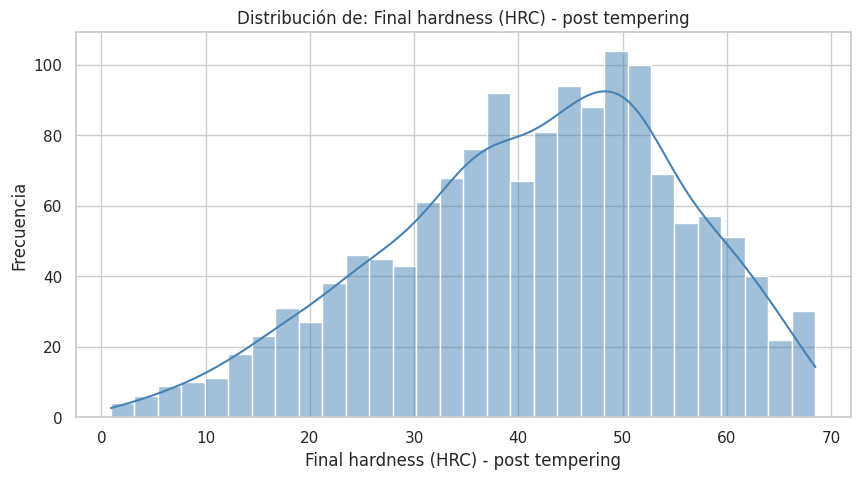

In [33]:
# Seleccionamos solo columnas numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Histograma con curva de densidad
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribución de: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()


### Análisis de Outliers

A continuación, se muestran los boxplots individuales de las principales variables continuas. Esto permite identificar valores atípicos que podrían afectar al modelo si no se tratan correctamente.


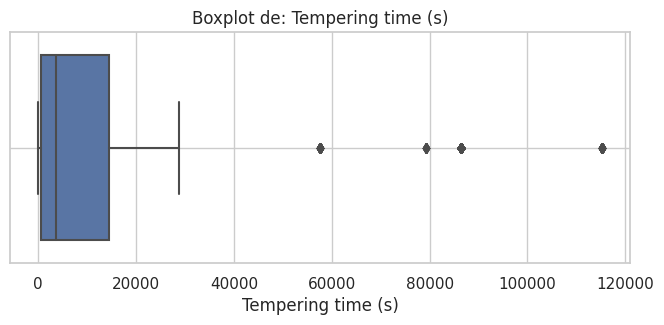

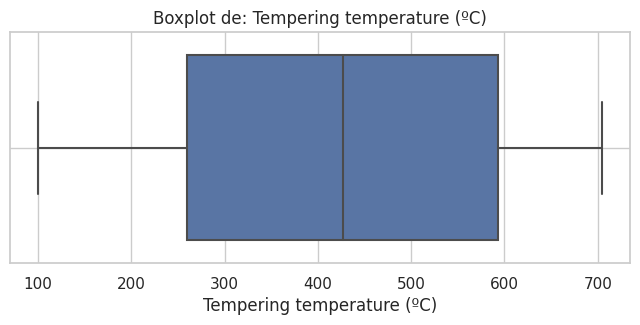

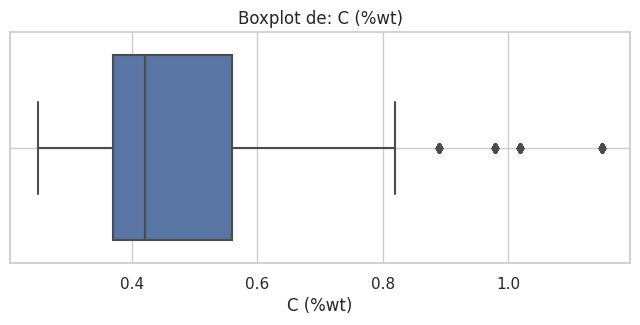

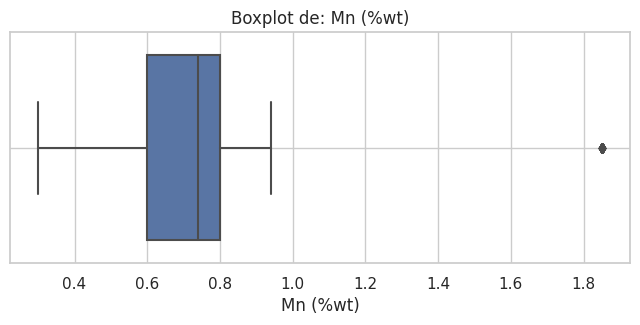

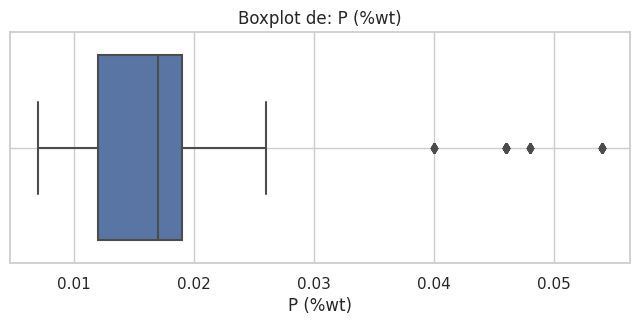

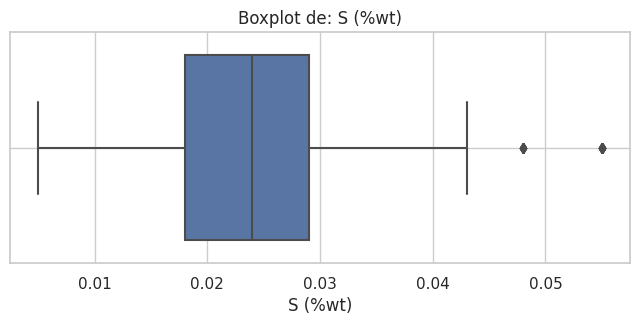

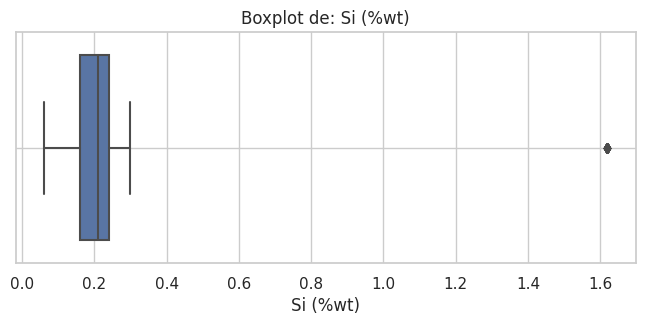

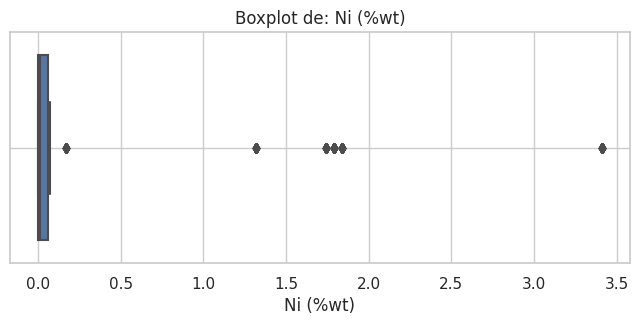

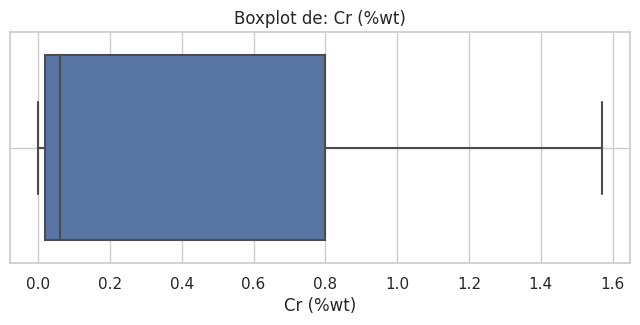

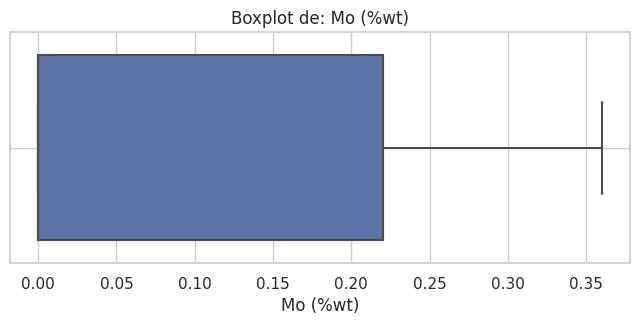

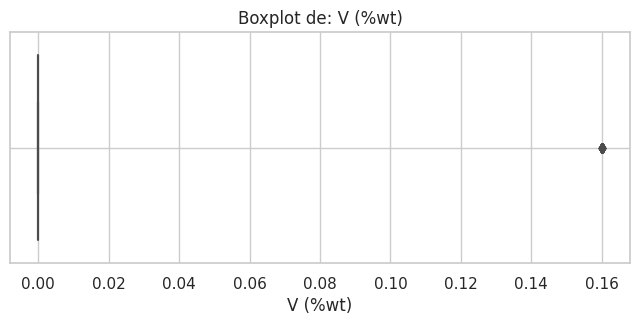

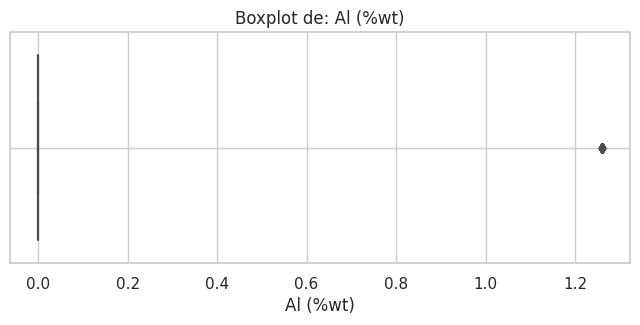

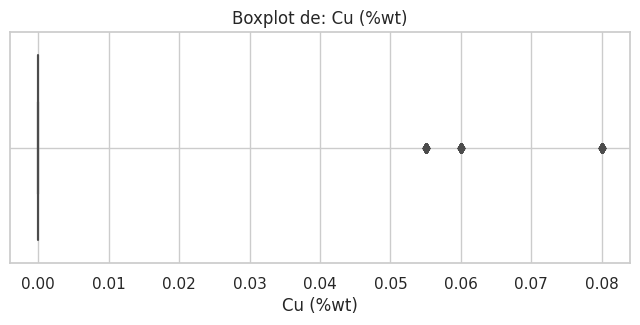

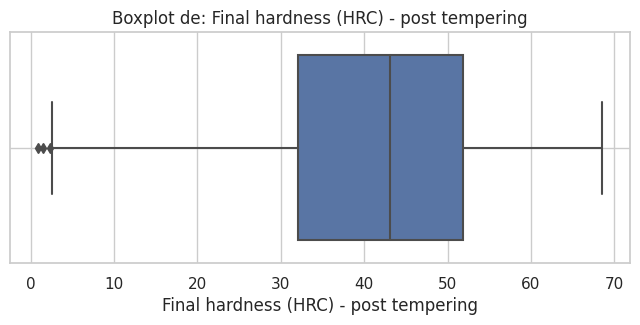

In [38]:
# Boxplot para detectar outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de: {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


In [22]:
# Contar valores nulos por columna
null_counts = df.isnull().sum()

# Mostrar solo columnas con nulos
null_counts = null_counts[null_counts > 0]

if not null_counts.empty:
    print("🔍 Columnas con valores nulos:")
    print(null_counts)
else:
    print("✅ No se encontraron valores nulos.")

✅ No se encontraron valores nulos.


/home/alexor/ailab/proyecto3_steels_regresion/venv_39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


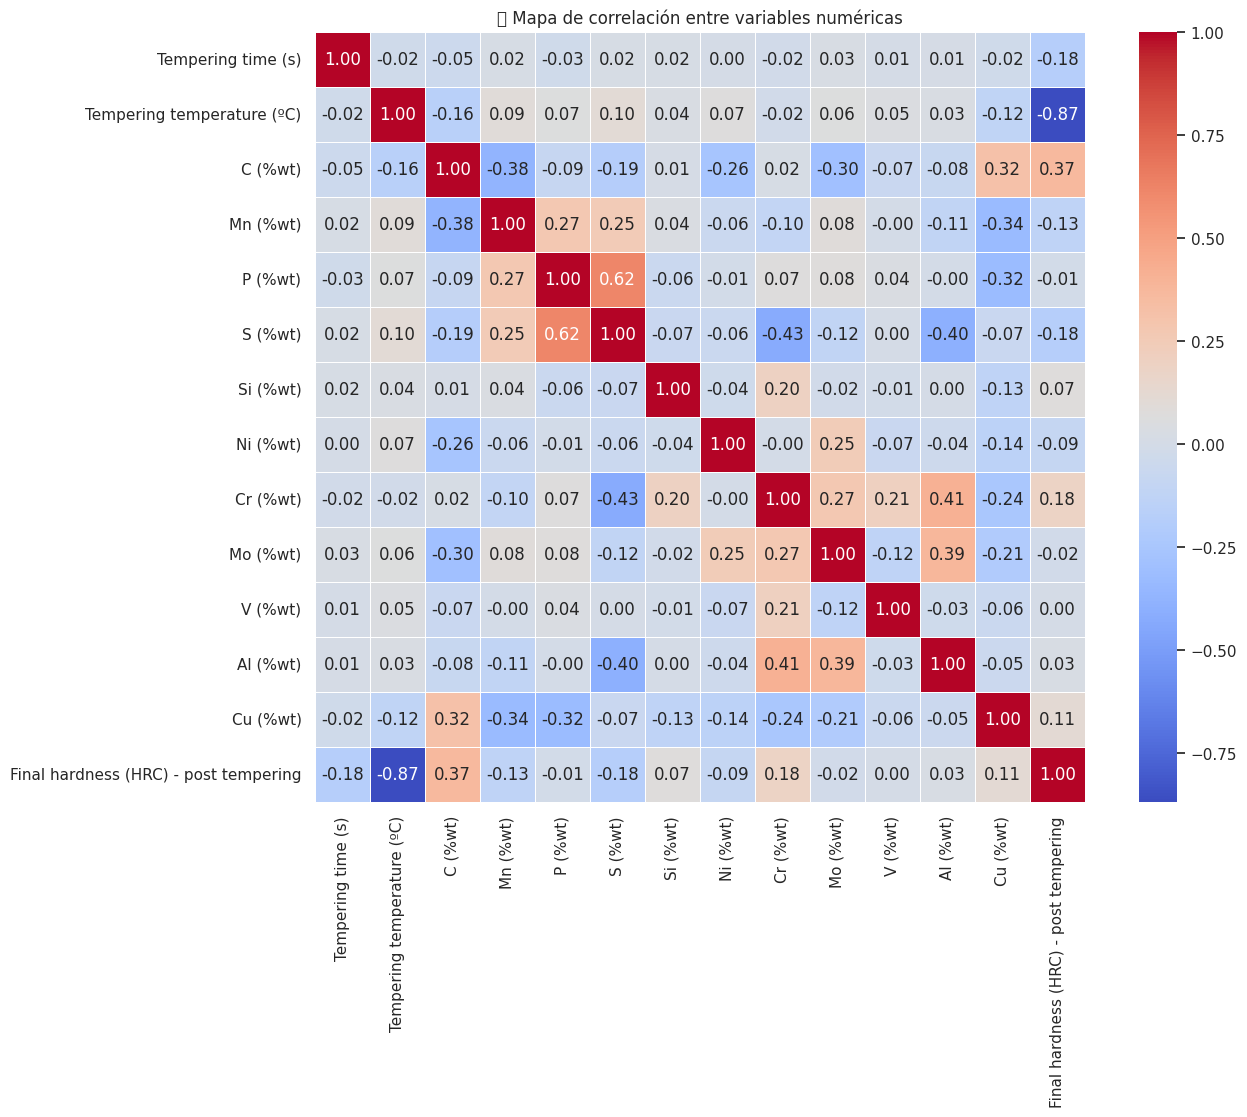

In [23]:
# Calcular matriz de correlación para columnas numéricas
corr_matrix = df[numeric_cols].corr()

# Graficar heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("🔗 Mapa de correlación entre variables numéricas")
plt.show()

In [24]:
# Revisar valores únicos de "Initial hardness"
df['Initial hardness (HRC) - post quenching'].unique()

array(['?', '58.8', '55.8', '61.6', '63.1', '63.3', '46.5', '63.0',
       '66.5', '67.0', '64.5'], dtype=object)

In [25]:
# Reemplazar '?' por NaN y convertir a numérico
df['Initial hardness (HRC) - post quenching'] = pd.to_numeric(
    df['Initial hardness (HRC) - post quenching'].replace('?', np.nan)
)

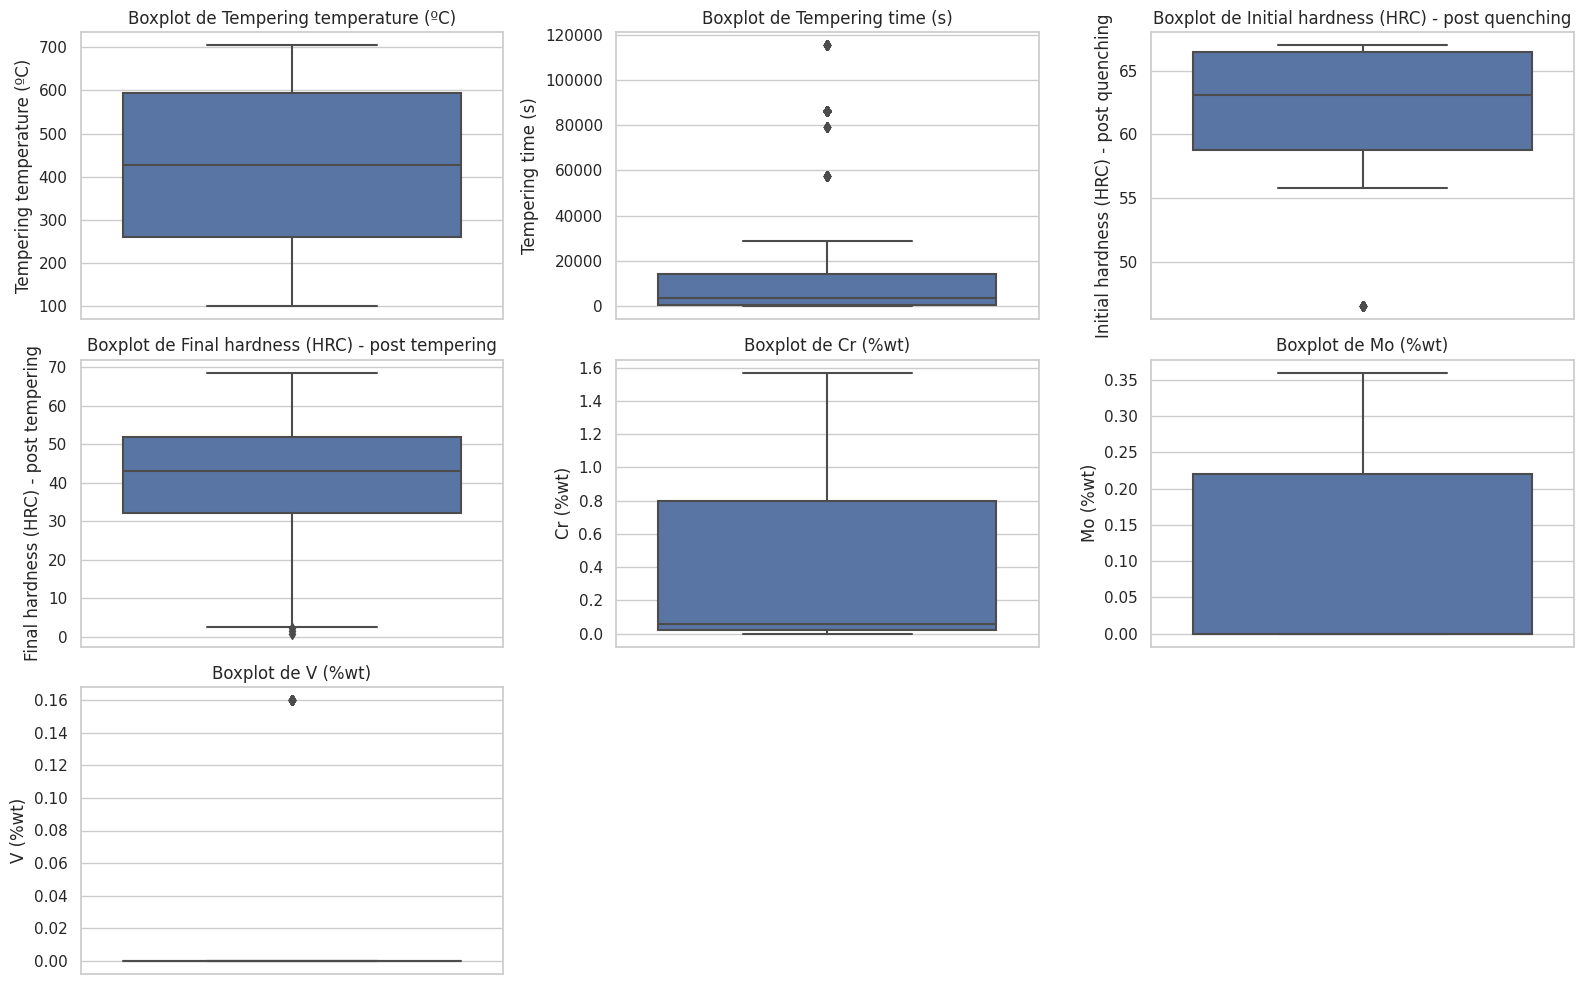

In [27]:
features_to_check = ['Tempering temperature (ºC)', 'Tempering time (s)',
                     'Initial hardness (HRC) - post quenching',
                     'Final hardness (HRC) - post tempering',
                     'Cr (%wt)', 'Mo (%wt)', 'V (%wt)']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.tight_layout()
plt.show()


In [29]:
# Crear una copia del dataframe limpio
df_clean = df.copy()

# Guardar en un nuevo archivo CSV (sin índice)
df_clean.to_csv("../data/clean_tempering_data.csv", index=False)

print("✅ Dataset limpio guardado como 'clean_tempering_data.csv'")

✅ Dataset limpio guardado como 'clean_tempering_data.csv'
